Task 04

Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.

Importing Data and Arranging them properly

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("/content/twitter_training.csv")
data.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [3]:
cols=['ID', 'platform', 'Sentiment', 'review']
data=pd.read_csv("/content/twitter_training.csv",names=cols)
data.head()

,ID,platform,Sentiment,review
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [4]:
data.shape

(46295, 4)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46295 entries, 0 to 46294
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         46295 non-null  int64 
 1   platform   46295 non-null  object
 2   Sentiment  46295 non-null  object
 3   review     45850 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.4+ MB


In [6]:
data.describe()

,ID
count,46295.000000
mean,6093.146042
std,4090.867555
min,1.000000
25%,1986.500000
50%,5590.000000
75%,9558.000000
max,13200.000000


In [7]:
data.describe(include=object)

,platform,Sentiment,review
count,46295,46295,45850
unique,20,4,42998
top,Microsoft,Positive,It is not the first time that the EU Commissio...
freq,2400,13710,109


In [8]:
#missing data
missing_data = data.isna().sum()
pd.set_option('display.max_rows', None)
print(missing_data)

ID             0
platform       0
Sentiment      0
review       445
dtype: int64


In [9]:
#removing null data
data=data.dropna()
#missing data
missing_data = data.isna().sum()
pd.set_option('display.max_rows', None)
print(missing_data)

ID           0
platform     0
Sentiment    0
review       0
dtype: int64


EDA

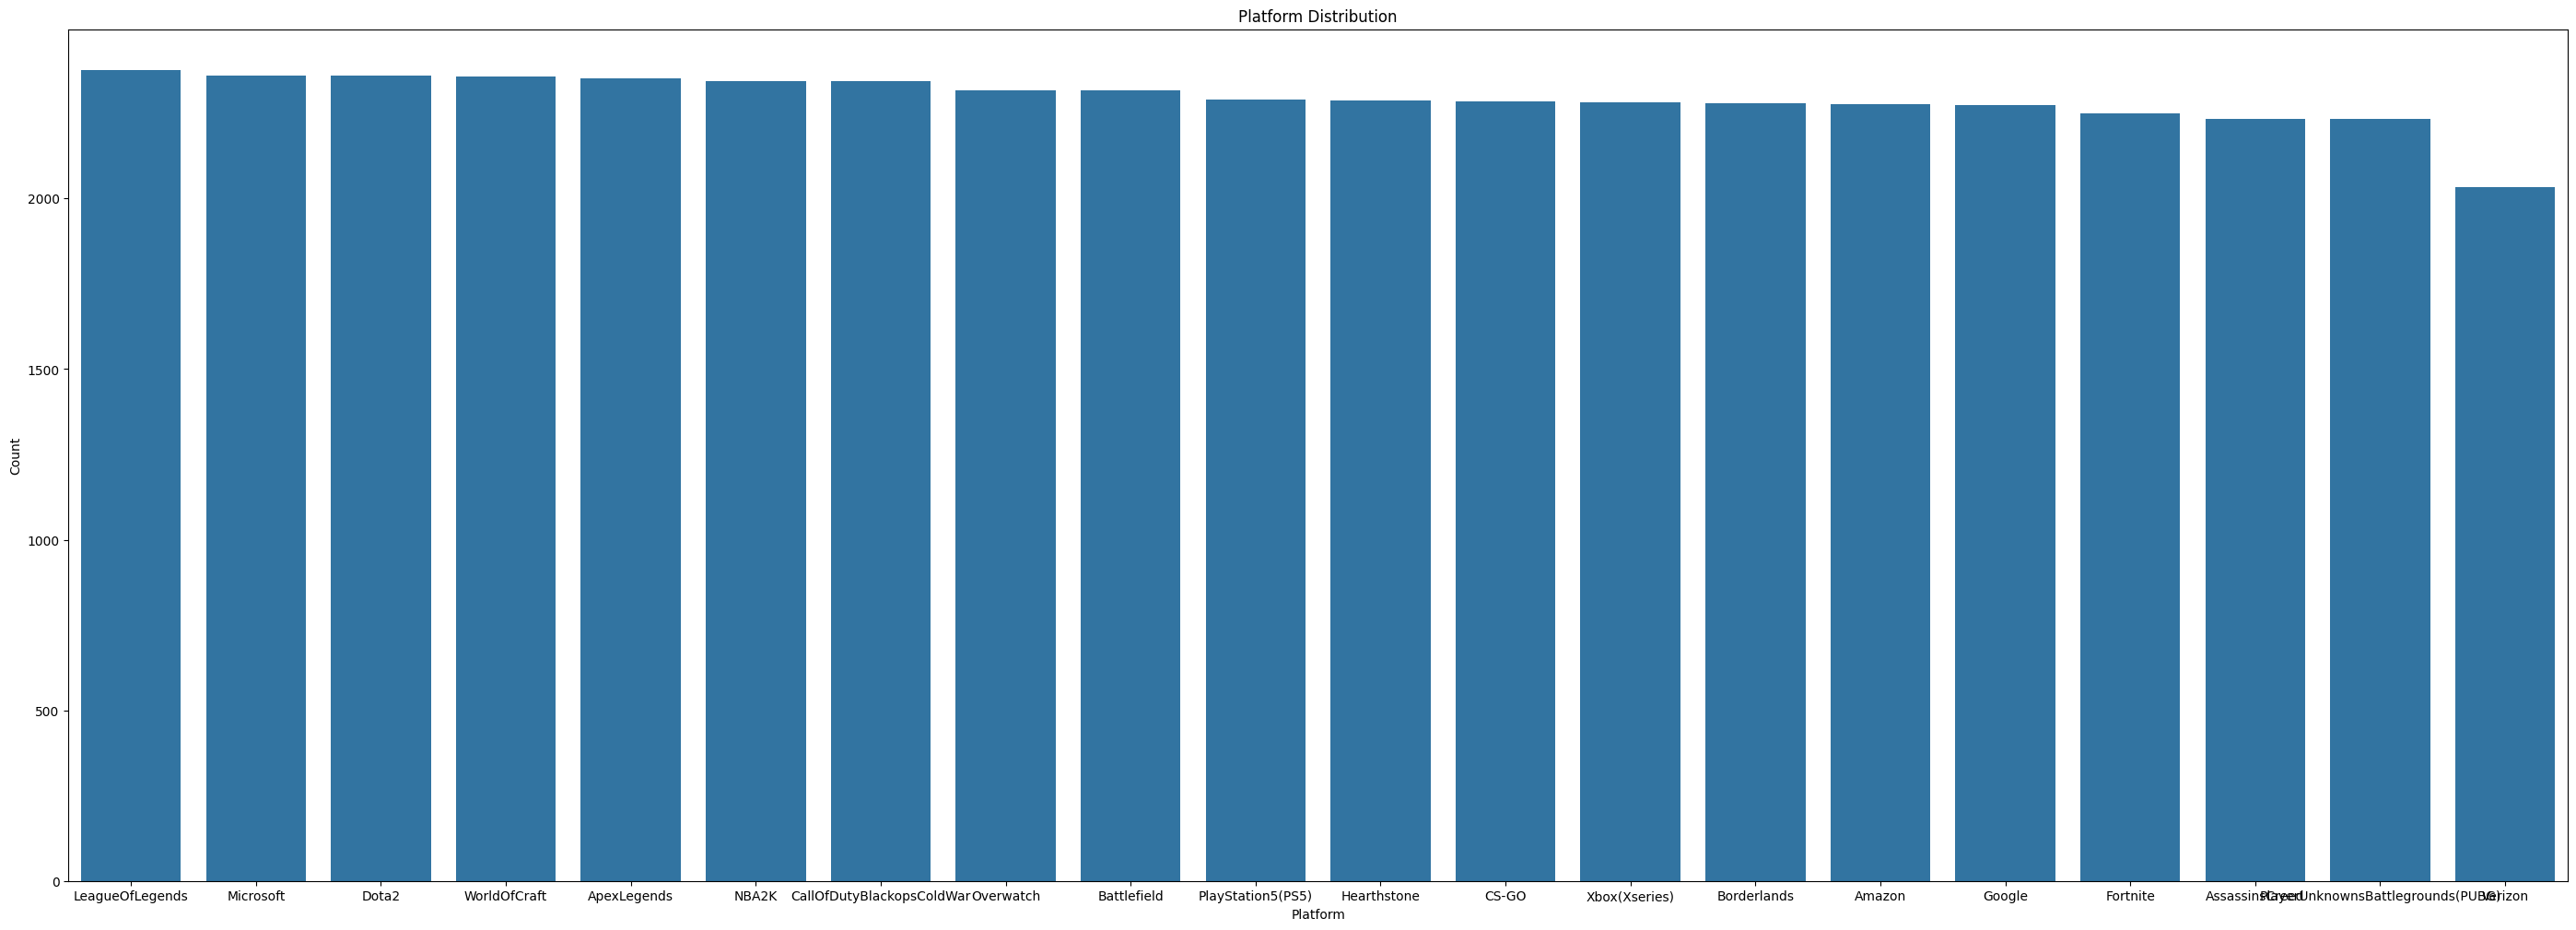

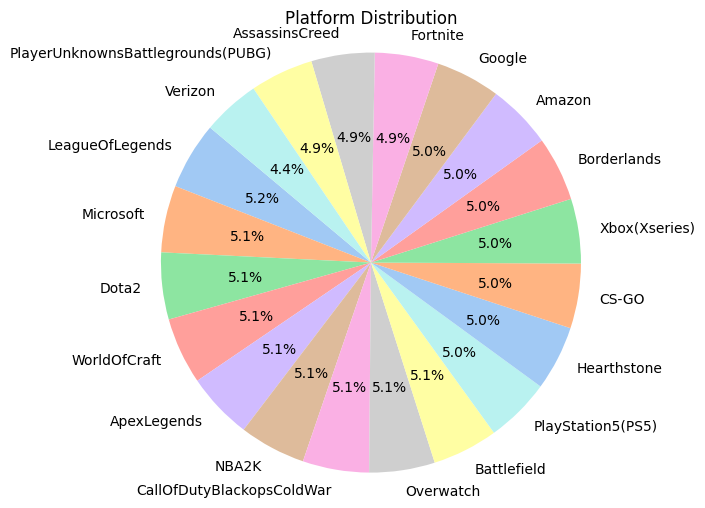

platform
LeagueOfLegends                      2377
Microsoft                            2361
Dota2                                2359
WorldOfCraft                         2357
ApexLegends                          2353
NBA2K                                2343
CallOfDutyBlackopsColdWar            2343
Overwatch                            2316
Battlefield                          2316
PlayStation5(PS5)                    2291
Hearthstone                          2286
CS-GO                                2284
Xbox(Xseries)                        2283
Borderlands                          2280
Amazon                               2276
Google                               2274
Fortnite                             2249
AssassinsCreed                       2234
PlayerUnknownsBattlegrounds(PUBG)    2234
Verizon                              2034
Name: count, dtype: int64


In [11]:
# Count of platform classes
platform_counts = data['platform'].value_counts()

# Bar Plot
plt.figure(figsize=(35, 12))
sns.barplot(x=platform_counts.index, y=platform_counts.values)
plt.title('Platform Distribution')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.show()

# Pie Chart
plt.figure(figsize=(8, 6))
plt.pie(platform_counts, labels=platform_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Platform Distribution')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.show()

print(platform_counts)

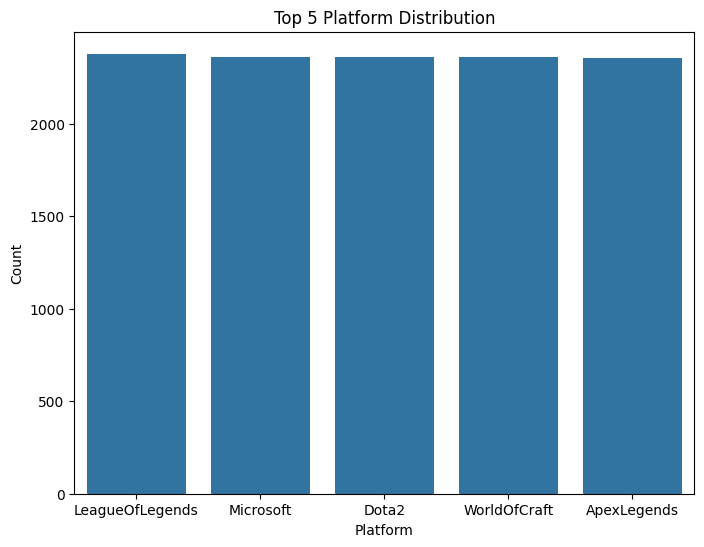

platform
LeagueOfLegends    2377
Microsoft          2361
Dota2              2359
WorldOfCraft       2357
ApexLegends        2353
Name: count, dtype: int64


In [12]:
# Count of platform classes
platform_counts_top5 = data['platform'].value_counts().nlargest(5)

# Bar Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=platform_counts_top5.index, y=platform_counts_top5.values)
plt.title('Top 5 Platform Distribution')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.show()

print(platform_counts_top5)

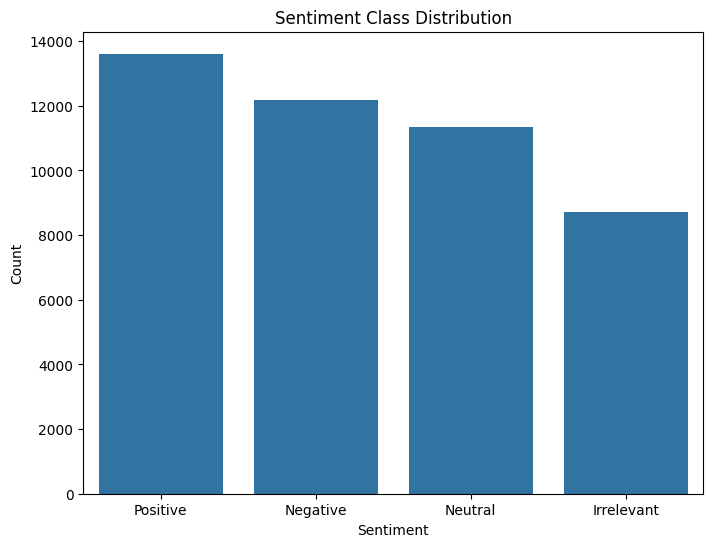

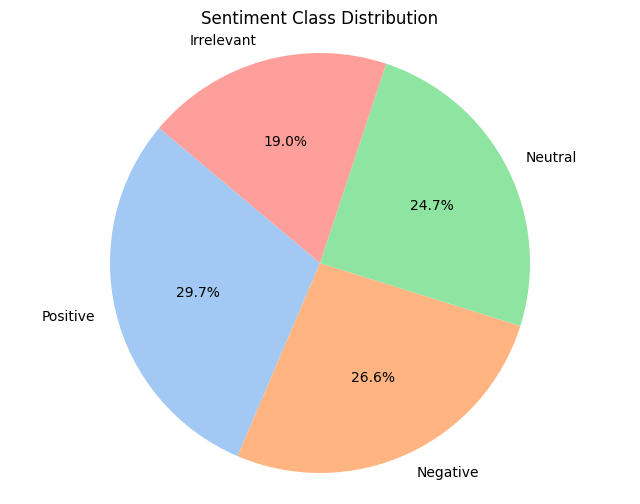

Sentiment
Positive      13610
Negative      12189
Neutral       11343
Irrelevant     8708
Name: count, dtype: int64


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count of sentiment classes
sentiment_counts = data['Sentiment'].value_counts()

# Bar Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Sentiment Class Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Pie Chart
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Sentiment Class Distribution')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.show()

print(sentiment_counts)

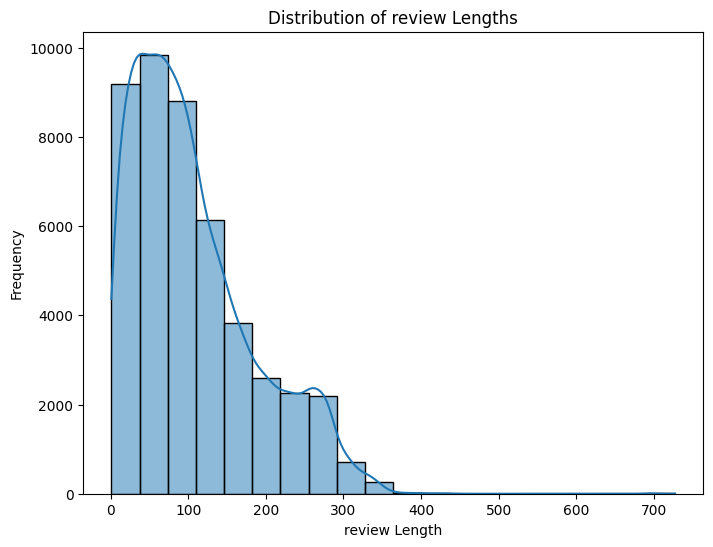

In [14]:
# Length of text
data['review_Length'] = data['review'].apply(len)

# Plot
plt.figure(figsize=(8, 6))
sns.histplot(data['review_Length'], bins=20, kde=True)
plt.title('Distribution of review Lengths')
plt.xlabel('review Length')
plt.ylabel('Frequency')
plt.show()

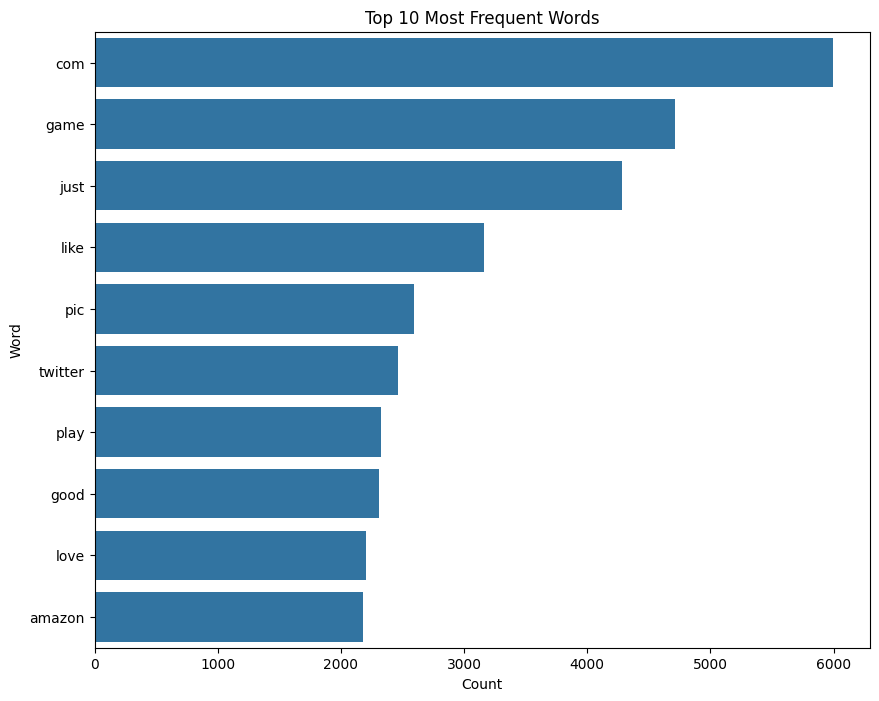

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

# Vectorize text
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['review'])
word_counts = X.toarray().sum(axis=0)
words = vectorizer.get_feature_names_out()

# Create DataFrame for word counts
word_freq_df = pd.DataFrame({'word': words, 'count': word_counts})
word_freq_df = word_freq_df.sort_values(by='count', ascending=False)

# Plot
plt.figure(figsize=(10, 8))
sns.barplot(x=word_freq_df.head(10)['count'], y=word_freq_df.head(10)['word'])
plt.title('Top 10 Most Frequent Words')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()

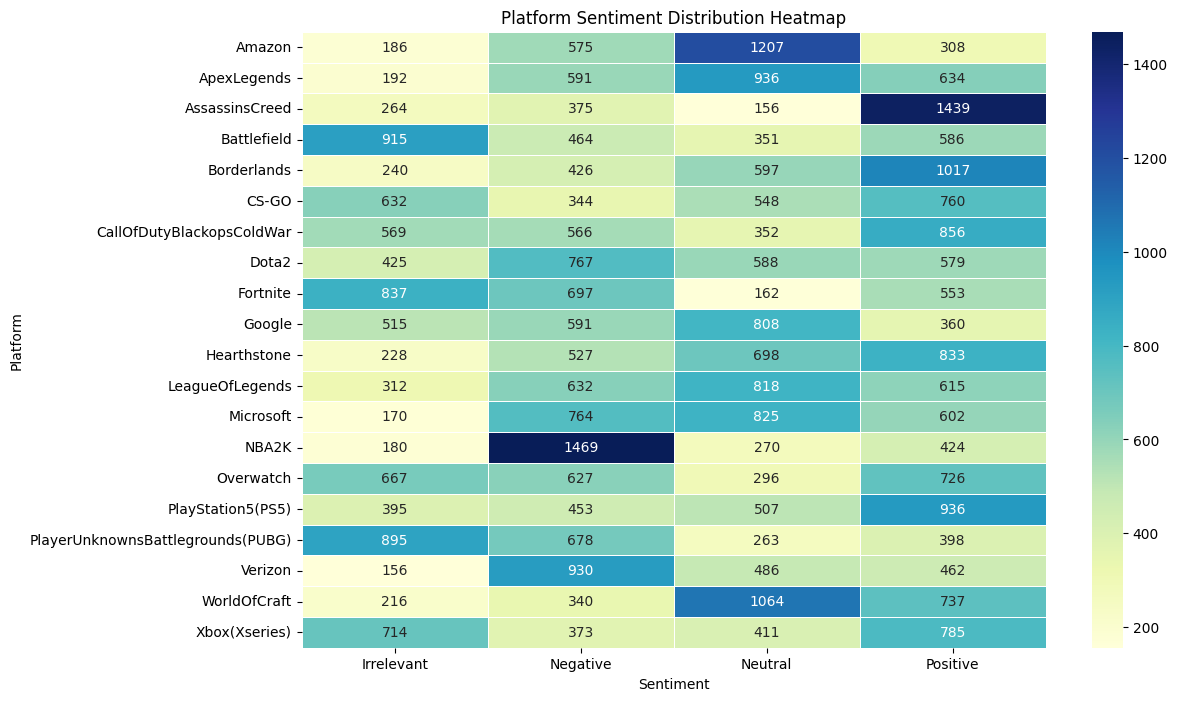

In [17]:
# Create the contingency table
platform_sentiment_table = pd.crosstab(data['platform'], data['Sentiment'])

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(platform_sentiment_table, annot=True, fmt="d", cmap="YlGnBu", linewidths=.5)
plt.title('Platform Sentiment Distribution Heatmap')
plt.xlabel('Sentiment')
plt.ylabel('Platform')
plt.show()

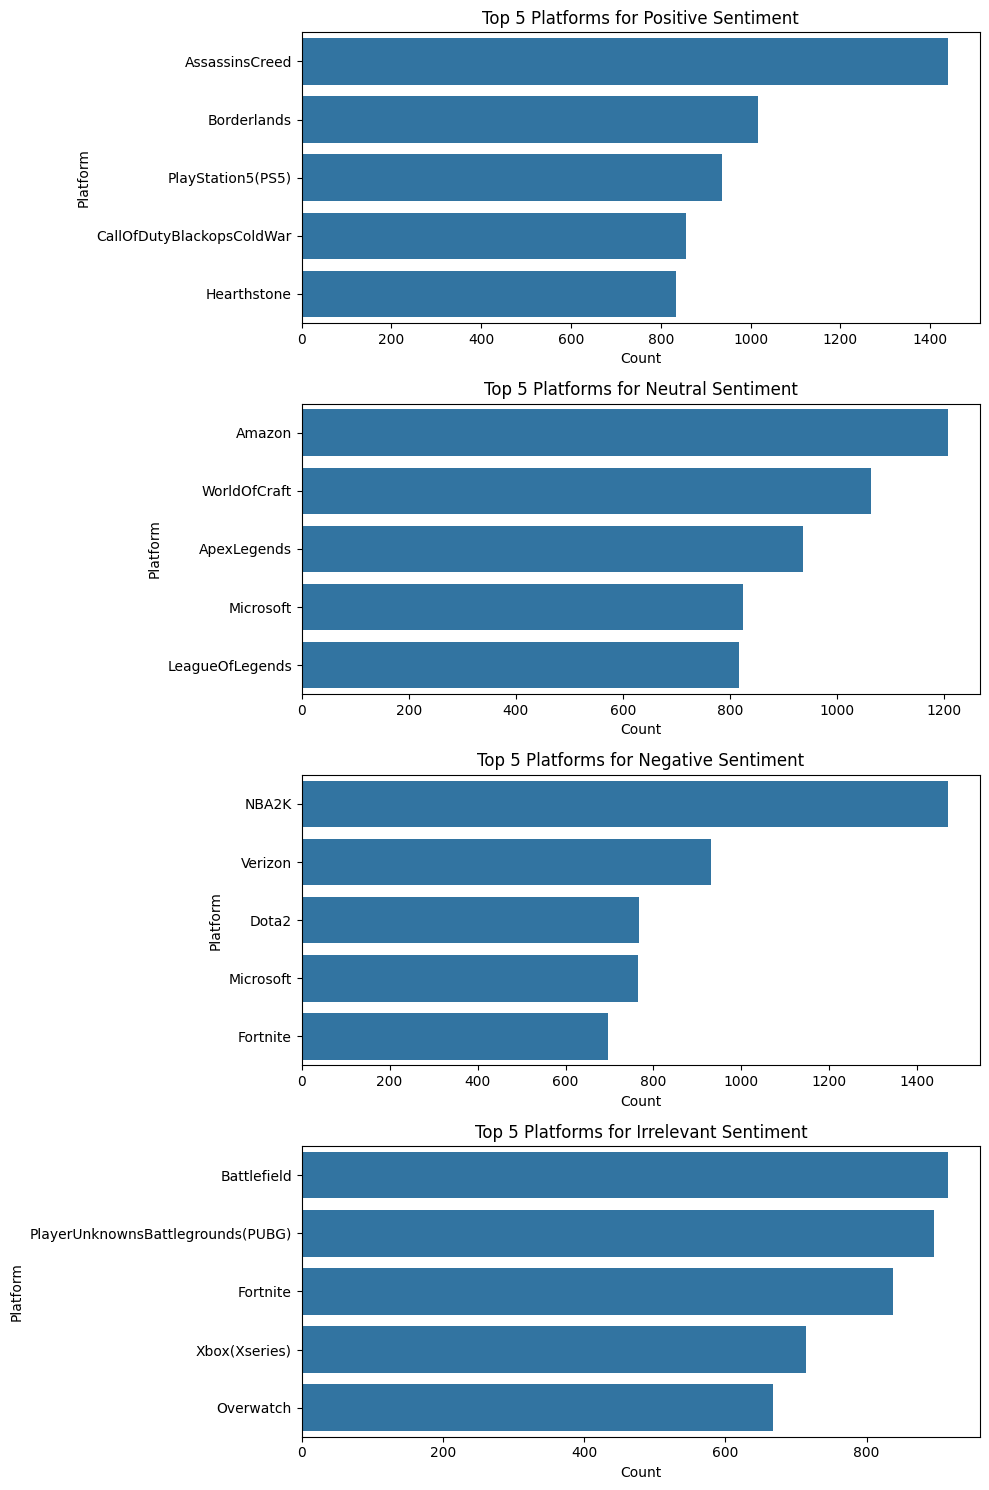

In [18]:
# Function to get top 5 platforms for each sentiment
def get_top_platforms(df, sentiment, top_n=5):
    filtered_df = df[df['Sentiment'] == sentiment]
    top_platforms = filtered_df['platform'].value_counts().nlargest(top_n)
    return top_platforms

# Sentiment categories
sentiments = data['Sentiment'].unique()

# Plotting
fig, axes = plt.subplots(nrows=len(sentiments), ncols=1, figsize=(10, 15))

for i, sentiment in enumerate(sentiments):
    top_platforms = get_top_platforms(data, sentiment)
    sns.barplot(x=top_platforms.values, y=top_platforms.index, ax=axes[i])
    axes[i].set_title(f'Top 5 Platforms for {sentiment} Sentiment')
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel('Platform')

plt.tight_layout()
plt.show()

In [19]:
pip install wordcloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


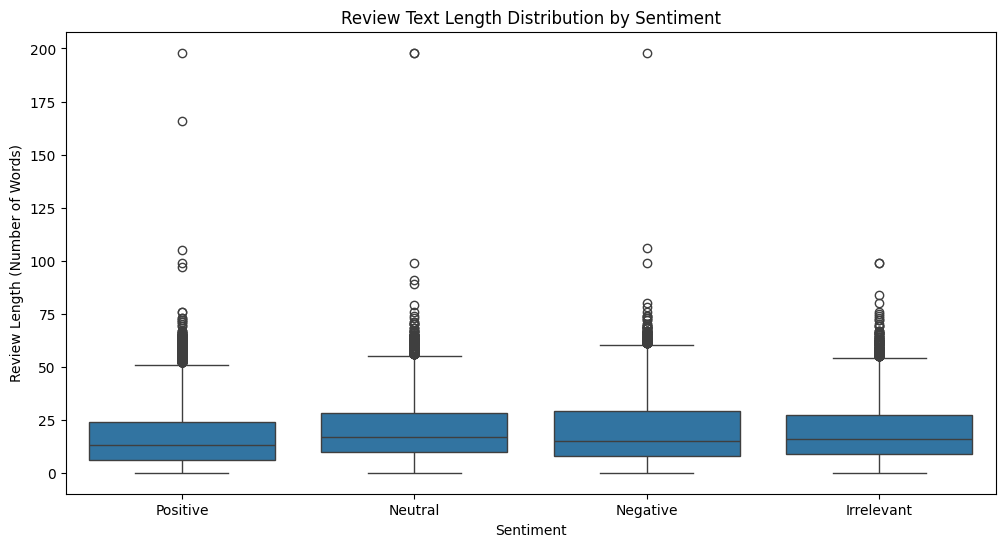

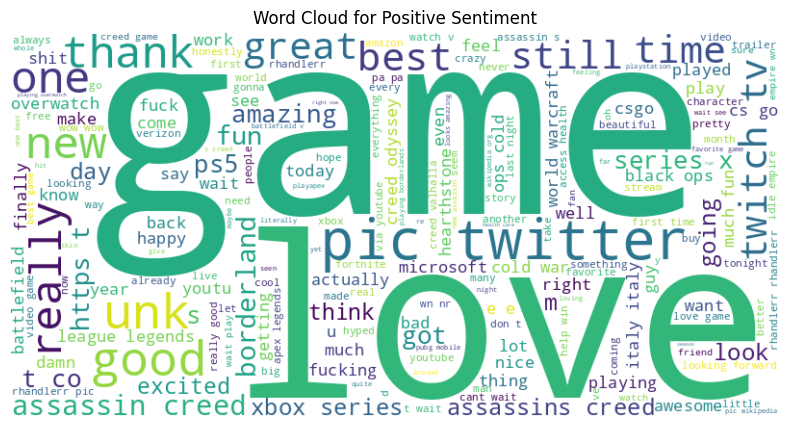

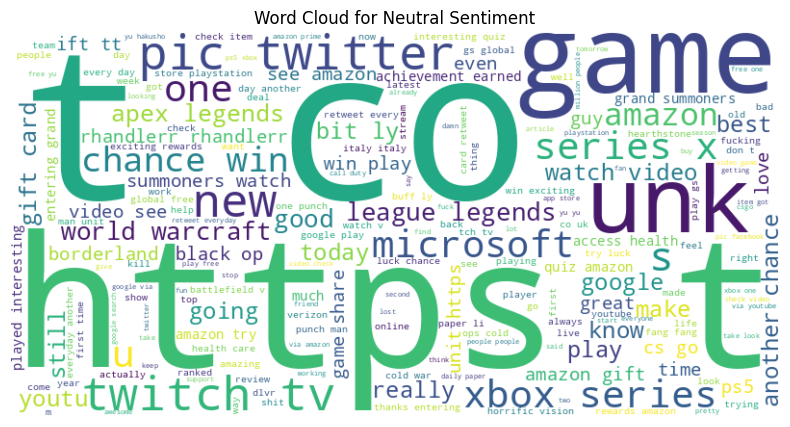

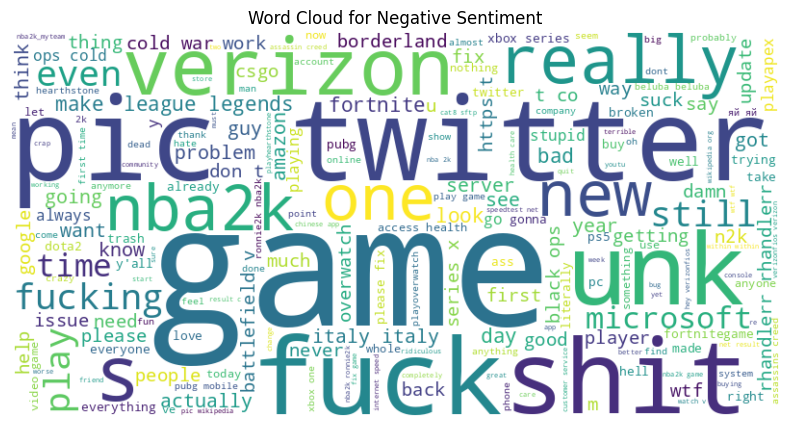

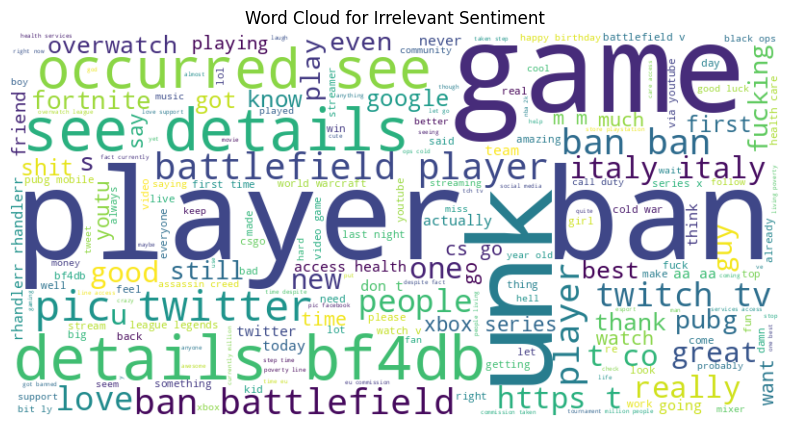

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud  # Importing WordCloud
import nltk
from nltk.corpus import stopwords
import string

# Ensure you have the stopwords downloaded
nltk.download('stopwords')
# Ensure you have the stopwords downloaded
nltk.download('stopwords')

data['review_length'] = data['review'].apply(lambda x: len(x.split()))

plt.figure(figsize=(12, 6))
sns.boxplot(x='Sentiment', y='review_length', data=data)
plt.title('Review Text Length Distribution by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Review Length (Number of Words)')
plt.show()

# Function to create and display a word cloud for each sentiment
def plot_word_cloud(data, sentiment):
    reviews = data[data['Sentiment'] == sentiment]['review'].values
    text = ' '.join(reviews)
     # Remove stopwords and punctuation
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word.lower() for word in text.split() if word.lower() not in stop_words and word not in string.punctuation])

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment} Sentiment')
    plt.axis('off')
    plt.show()

# Plot word clouds for each sentiment
sentiments = data['Sentiment'].unique()
for sentiment in sentiments:
    plot_word_cloud(data, sentiment)

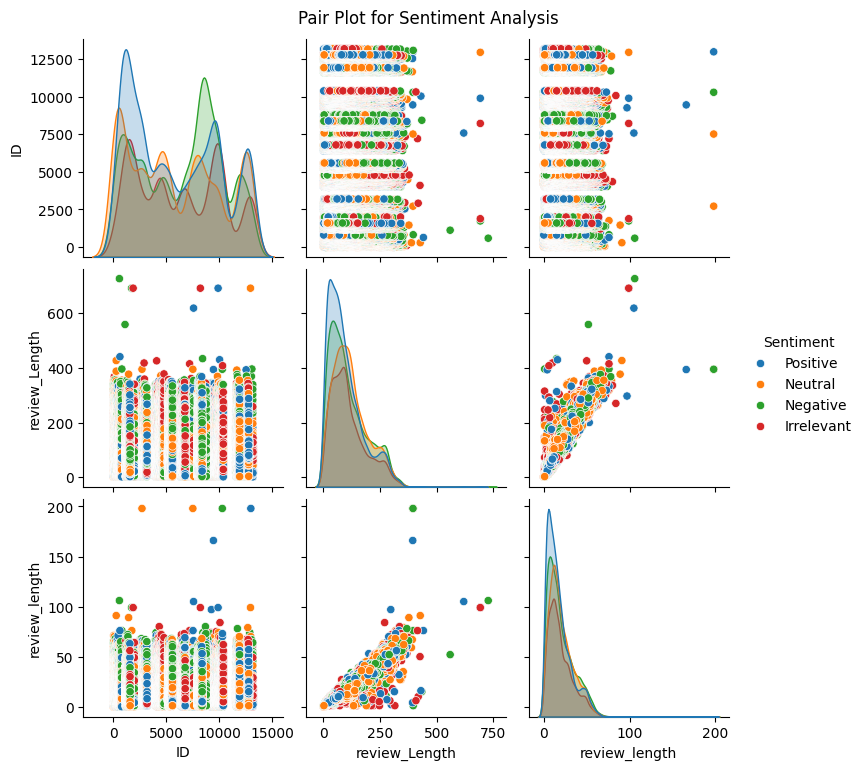

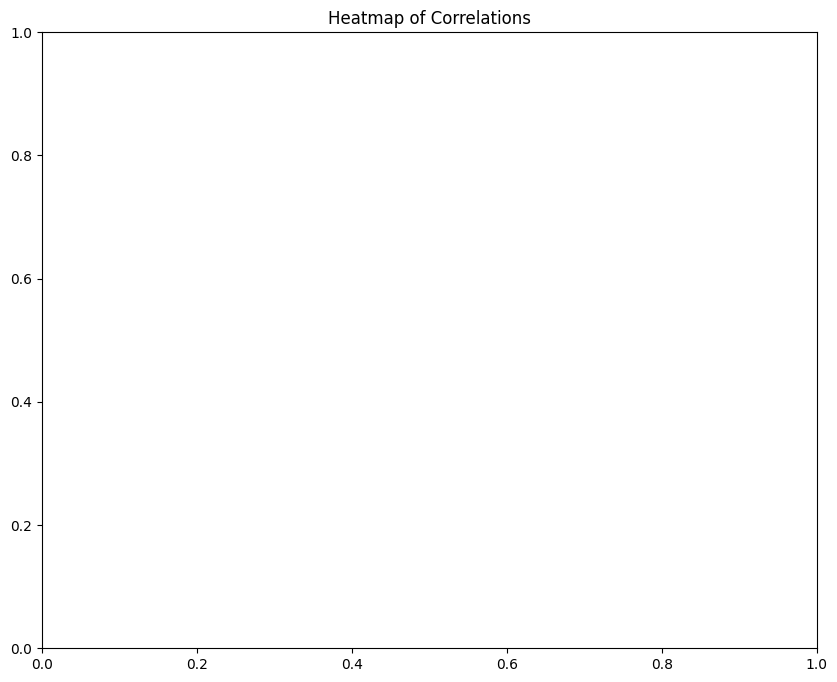

In [22]:
# Text length distribution
data['review_length'] = data['review'].apply(lambda x: len(x.split()))

# Pair plot for numerical and categorical data
sns.pairplot(data, hue='Sentiment', diag_kind='kde')
plt.suptitle('Pair Plot for Sentiment Analysis', y=1.02)
plt.show()

# Heatmap for correlation (though limited numerical data here)
plt.figure(figsize=(10, 8))
#sns.heatmap(data.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap of Correlations')
plt.show()